In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm


file = 'ida_4g.xlsx'
df = pd.read_excel(file)
df.keys()

Index(['ns1:open', 'ns1:name', 'id', 'ns1:color', 'ns1:width',
       'ns2:outerColor', 'ns2:outerWidth', 'ns1:color2', 'ns1:scale',
       'ns1:href', 'ns1:name3', 'ns1:styleUrl', 'ns1:tessellate',
       'ns1:coordinates', 'ns1:open4', 'ns1:name5', 'ns1:open6', 'ns1:name7',
       'ns1:name8', 'ns1:description', 'ns1:styleUrl9', 'ns1:coordinates10'],
      dtype='object')

In [2]:
important_info = df[['ns1:name7','ns1:name8','ns1:coordinates10','ns1:description']]

LOS 18100... LTE SON LAS DISTINTAS ESTACIONES A LAS QUE SE CONECTA

In [3]:
important_info.dropna(inplace=True)

C:\Users\mario\AppData\Local\Temp\ipykernel_16092\937143469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info.dropna(inplace=True)


LAC: Location Area Code, CID: Cell id (antena a la que está conectada), RNC: Controlador de estación radio,

In [4]:
important_info['time'] = 0

C:\Users\mario\AppData\Local\Temp\ipykernel_16092\4160243742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info['time'] = 0


In [5]:
time = []
for index,row in important_info.iterrows():
  if 'TIMESTAMP:' in row['ns1:description']:
    time_aux = row['ns1:description'].split('2023 ')[1]
    time.append(time_aux)
  else:
    time.append(False)

time


[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 '07:37:44',
 '07:37:49',
 False,
 '07:35:19',
 '07:35:24',
 False,
 '07:34:59',
 '07:35:04',
 '07:35:09',
 '07:34:24',
 '07:35:14',
 '07:35:29',
 '07:35:34',
 '07:35:39',
 '07:35:49',
 '07:35:44',
 '07:35:54',
 '07:35:59',
 '07:36:04',
 False,
 '07:33:14',
 '07:33:19',
 '07:33:24',
 '07:33:29',
 '07:33:34',
 '

In [6]:
import datetime

new_time = []
for string in time:
  if string == False:
    new_time.append(False)
  else:
    date = datetime.datetime.strptime(string,'%H:%M:%S')
    new_time.append(date)

In [7]:
new_time

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 datetime.datetime(1900, 1, 1, 7, 37, 44),
 datetime.datetime(1900, 1, 1, 7, 37, 49),
 False,
 datetime.datetime(1900, 1, 1, 7, 35, 19),
 datetime.datetime(1900, 1, 1, 7, 35, 24),
 False,
 datetime.datetime(1900, 1, 1, 7, 34, 59),
 datetime.datetime(1900, 1, 1, 7, 35, 4),
 datetime.datetime(1900, 1, 1, 7, 35, 9

In [8]:
important_info['timestamps'] = new_time


C:\Users\mario\AppData\Local\Temp\ipykernel_16092\2140480920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info['timestamps'] = new_time


In [9]:
important_info

,ns1:name7,ns1:name8,ns1:coordinates10,ns1:description,time,timestamps
15,LAC: 18100 CID: 131 RNC: 0 PSC: 50,18100/131 GSM,"-0.355094,39.475414","~807 (yd), Comunidad Valenciana, Carrer de Bèl...",0,False
16,LAC: 18100 CID: 132 RNC: 0 PSC: 18,18100/132 GSM,"-0.35702,39.468292",~2184 (yd),0,False
17,LAC: 18100 CID: 133 RNC: 0 PSC: 41,18100/133 GSM,"-0.356098,39.46389",~2024 (yd),0,False
18,LAC: 18100 CID: 134 RNC: 0 PSC: 31,18100/134 GSM,"-0.355521,39.48126","~3278 (yd), Comunidad Valenciana, Carrer de Da...",0,False
19,LAC: 18100 CID: 135 RNC: 0 PSC: 26,18100/135 GSM,"-0.345113,39.483593",~1042 (yd),0,False
...,...,...,...,...,...,...
360,LAC: 18400 CID: 860088:22 RNC: 0 PSC: 245,-85,"-0.378403,39.455768",LAC: 18400 CID: 860088:22 RNC: 0 PSC: 245\nACC...,0,1900-01-01 07:30:54
361,LAC: 18400 CID: 860088:22 RNC: 0 PSC: 245,-85,"-0.37783,39.456008",LAC: 18400 CID: 860088:22 RNC: 0 PSC: 245\nACC...,0,1900-01-01 07:30:59
362,LAC: 18400 CID: 860088:90 RNC: 0 PSC: 149,18400/220182618 LTE,"-0.391172,39.467296","~19400 (yd), Comunidad Valenciana, Av. del Cid...",0,False
363,LAC: 18400 CID: 860088:90 RNC: 0 PSC: 149,-91,"-0.374164,39.457576",LAC: 18400 CID: 860088:90 RNC: 0 PSC: 149\nACC...,0,1900-01-01 07:31:49


In [10]:
import datetime

new_time = []
for string in time:
  if string == False:
    new_time.append(False)
  else:
    date = datetime.datetime.strptime(string,'%H:%M:%S')
    new_time.append(date)


last_false = 0
least_time = datetime.datetime.strptime('23:59:59','%H:%M:%S')

for index in range(len(new_time)):

  if new_time[index] != False and new_time[index] < least_time:
    print(index)
    least_time = new_time[index]

  if new_time[index] == False and index != 0:
    print(least_time, new_time[index])
    new_time[last_false] = least_time
    last_false = index
    least_time = datetime.datetime.strptime('23:59:59','%H:%M:%S')

  if index == len(new_time)-1:
    new_time[last_false] = least_time
    last_false = index

1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 23:59:59 False
1900-01-01 2

In [11]:
new_time

[datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 23, 59, 59),
 datetime.datetime(1900, 1, 1, 2

In [12]:
important_info['timestamp'] = new_time

C:\Users\mario\AppData\Local\Temp\ipykernel_16092\3390828414.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info['timestamp'] = new_time


In [13]:
important_info = important_info.drop(columns = ['timestamps'])

In [14]:
important_info = important_info.sort_values(by=['timestamp', 'ns1:description'], ascending=[True, False])


In [15]:
important_info

,ns1:name7,ns1:name8,ns1:coordinates10,ns1:description,time,timestamp
298,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,18400/220160257 LTE,"-0.400354,39.472035","~2033 (yd), Comunidad Valenciana, C. de la Pil...",0,1900-01-01 07:24:43
299,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,-97,"-0.39602,39.472278",LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262\nACCU...,0,1900-01-01 07:24:43
300,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,-98,"-0.396013,39.473121",LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262\nACCU...,0,1900-01-01 07:24:51
301,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,-116,"-0.394841,39.473236",LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262\nACCU...,0,1900-01-01 07:25:11
292,LAC: 18400 CID: 860001:0 RNC: 0 PSC: 261,18400/220160256 LTE,"-0.392172,39.471867","~1386 (yd), Comunidad Valenciana, C/ de Sta. M...",0,1900-01-01 07:25:16
...,...,...,...,...,...,...
175,LAC: 18100 CID: 30030 RNC: 3901 PSC: 143,18100/30030 WCDMA,"-0.357209,39.47405","~1101 (yd), Comunidad Valenciana, Av. de Suèci...",0,1900-01-01 23:59:59
44,LAC: 18100 CID: 683 RNC: 0 PSC: 4,18100/683 GSM,"-0.364863,39.463547","~1100 (yd), Comunidad Valenciana, Av. del Regn...",0,1900-01-01 23:59:59
97,LAC: 18100 CID: 7451 RNC: 0 PSC: 11,18100/7451 GSM,"-0.353345,39.47813",~1085 (yd),0,1900-01-01 23:59:59
93,LAC: 18100 CID: 7445 RNC: 0 PSC: 52,18100/7445 GSM,"-0.333509,39.47713","~1072 (yd), Comunidad Valenciana, 109_AVDA. NA...",0,1900-01-01 23:59:59


In [16]:
important_info.to_excel('ida_4g_well_formated.xlsx')

In [17]:
#Convert timestamp to seconds
important_info['timestamp(s)'] = important_info['timestamp'].apply(lambda x: x.hour*3600 + x.minute*60 + x.second)


In [18]:
# Import the necessary libraries
import pandas as pd
import datetime

# Create a function that makes all the data treatment
def data_treatment(file):
    # Read the data from an Excel file into a DataFrame
    df = pd.read_excel(file)
    
    # Select only the columns you need
    important_info = df[['ns1:name7', 'ns1:name8', 'ns1:coordinates10', 'ns1:description']]
    
    # Remove rows with missing values
    important_info.dropna(inplace=True)
    
    # Initialize a 'time' column with zeros
    important_info['time'] = 0
    time = []
    
    # Iterate through the rows of 'important_info'
    for index, row in important_info.iterrows():
        # Check if 'ns1:description' contains 'TIMESTAMP:'
        if 'TIMESTAMP:' in row['ns1:description']:
            # Split the description to extract the time
            time_aux = row['ns1:description'].split('2023 ')[1]
            time.append(time_aux)
        else:
            time.append(False)
    
    new_time = []
    
    # Process the extracted time data
    for string in time:
        if string == False:
            new_time.append(False)
        else:
            date = datetime.datetime.strptime(string, '%H:%M:%S')
            new_time.append(date)
    
    last_false = 0
    least_time = datetime.datetime.strptime('23:59:59', '%H:%M:%S')
    
    # Update 'new_time' to fill in missing values with the least time
    for index in range(len(new_time)):
        if new_time[index] != False and new_time[index] < least_time:
            least_time = new_time[index]
        if new_time[index] == False and index != 0:
            new_time[last_false] = least_time
            last_false = index
            least_time = datetime.datetime.strptime('23:59:59', '%H:%M:%S')
        if index == len(new_time) - 1:
            new_time[last_false] = least_time
            last_false = index
    
    # Add the 'timestamp' column to 'important_info'
    important_info['timestamp'] = new_time
    
    # Remove the 'time' column
    important_info = important_info.drop(columns=['time'])
    
    # Sort the DataFrame by 'timestamp' and 'ns1:description'
    important_info = important_info.sort_values(by=['timestamp', 'ns1:description'], ascending=[True, False])
    
    # Add a 'timestamp(s)' column in seconds
    important_info['timestamp(s)'] = important_info['timestamp'].apply(lambda x: x.hour * 3600 + x.minute * 60 + x.second)

    #clean the timestamp in seconds, substract the least value to start from 0
    important_info['timestamp(s)'] = important_info['timestamp(s)'] - important_info['timestamp(s)'].min()
    
    # Return the processed DataFrame
    important_info['ns1:name8_cleaned'] = important_info['ns1:name8'].apply(lambda x: int(x) if '-' in x else x)
    
    important_info['ns1:name8_cleaned'] = pd.to_numeric(important_info['ns1:name8_cleaned'], errors='coerce')
    #dropna ns1:name8_cleaned
    

    
    return important_info

# Call the 'data_treatment' function with the specified file
important_info = data_treatment('ida_4g.xlsx')

important_info

C:\Users\mario\AppData\Local\Temp\ipykernel_16092\456676598.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info.dropna(inplace=True)
C:\Users\mario\AppData\Local\Temp\ipykernel_16092\456676598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info['time'] = 0
C:\Users\mario\AppData\Local\Temp\ipykernel_16092\456676598.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,ns1:name7,ns1:name8,ns1:coordinates10,ns1:description,timestamp,timestamp(s),ns1:name8_cleaned
298,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,18400/220160257 LTE,"-0.400354,39.472035","~2033 (yd), Comunidad Valenciana, C. de la Pil...",1900-01-01 07:24:43,0,NaN
299,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,-97,"-0.39602,39.472278",LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262\nACCU...,1900-01-01 07:24:43,0,-97.0
300,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,-98,"-0.396013,39.473121",LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262\nACCU...,1900-01-01 07:24:51,8,-98.0
301,LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262,-116,"-0.394841,39.473236",LAC: 18400 CID: 860001:1 RNC: 0 PSC: 262\nACCU...,1900-01-01 07:25:11,28,-116.0
292,LAC: 18400 CID: 860001:0 RNC: 0 PSC: 261,18400/220160256 LTE,"-0.392172,39.471867","~1386 (yd), Comunidad Valenciana, C/ de Sta. M...",1900-01-01 07:25:16,33,NaN
...,...,...,...,...,...,...,...
175,LAC: 18100 CID: 30030 RNC: 3901 PSC: 143,18100/30030 WCDMA,"-0.357209,39.47405","~1101 (yd), Comunidad Valenciana, Av. de Suèci...",1900-01-01 23:59:59,59716,NaN
44,LAC: 18100 CID: 683 RNC: 0 PSC: 4,18100/683 GSM,"-0.364863,39.463547","~1100 (yd), Comunidad Valenciana, Av. del Regn...",1900-01-01 23:59:59,59716,NaN
97,LAC: 18100 CID: 7451 RNC: 0 PSC: 11,18100/7451 GSM,"-0.353345,39.47813",~1085 (yd),1900-01-01 23:59:59,59716,NaN
93,LAC: 18100 CID: 7445 RNC: 0 PSC: 52,18100/7445 GSM,"-0.333509,39.47713","~1072 (yd), Comunidad Valenciana, 109_AVDA. NA...",1900-01-01 23:59:59,59716,NaN


In [19]:
important_info = data_treatment('ida_4g.xlsx')

C:\Users\mario\AppData\Local\Temp\ipykernel_16092\456676598.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info.dropna(inplace=True)
C:\Users\mario\AppData\Local\Temp\ipykernel_16092\456676598.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  important_info['time'] = 0
C:\Users\mario\AppData\Local\Temp\ipykernel_16092\456676598.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [35]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'ns1:name8_cleaned' to numeric, coercing non-numeric values to NaN

#create a function to plot the data
def plot_numeric_data(data, timestamp):
    # Setting Seaborn style and initial figure size
    plt.figure(figsize=(10, 5))

    # Plot 'ns1:name8_cleaned' against 'timestamp(s)' as a line plot for numeric values
    numeric_data = data.dropna(subset=['ns1:name8_cleaned'])
    sns.lineplot(data=numeric_data, x='timestamp(s)', y='ns1:name8_cleaned', label='Numeric Values (dBm)', color = 'darkblue')


    counter = 0 
    # Add vertical lines for non-numeric values
    for index, row in data.iterrows():
        if pd.isna(row['ns1:name8_cleaned']):
            counter += 1 
            plt.axvline(row['timestamp(s)'], color='darkorange', linestyle='--', label='Non-numeric Value')
    print(f"Se han contado {counter} cambios de base")

    plt.xlabel('Timestamp (s)')
    plt.ylabel('Power(dBm)')
    plt.title('Power(dBm) vs. Timestamp(s)')

    # Limit x-axis
    plt.xlim(0, timestamp)

    # Removing the legend as per the request
    plt.gca().legend().set_visible(False)

    plt.show()

# Call the 'plot_numeric_data' function with the specified DataFrame


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

def data_plot(file, title):
    # Use data_treatment() to read and process the data
    important_info = data_treatment(file)
    # Mean value
    valor_medio = important_info['ns1:name8_cleaned'].mean()

    # Specify the figure size as 16:9
    fig, axes = plt.subplots(2, 2, figsize=(16, 9))

    fig.suptitle(title, fontsize=16)

    # Make a lineplot with sns, with the mean value
    sns.lineplot(data=important_info, x='timestamp(s)', y='ns1:name8_cleaned', ax=axes[0, 0], label='Signal', color='darkblue', linewidth=2)
    axes[0, 0].axhline(y=valor_medio, color='darkorange', linestyle='--', label='Mean Level', linewidth=3)

    axes[0, 0].set_xlabel('Timestamp (s)', fontsize=14)
    axes[0, 0].set_ylabel('Power (dBm)', fontsize=14)
    axes[0, 0].set_title('Signal and Mean Level vs. Timestamp(s)', fontsize=14)

    # Make a histogram with sns
    hist = sns.histplot(important_info['ns1:name8_cleaned'], ax=axes[0, 1], bins=20, color='darkblue', edgecolor='black')
    axes[0, 1].axvline(x=valor_medio, color='darkorange', linestyle='--', label='Mean Level', linewidth=3)
    axes[0, 1].set_xlabel('Value', fontsize=14)
    axes[0, 1].set_ylabel('Frequency', fontsize=14)
    axes[0, 1].set_title('Power Levels Frequency', fontsize=14)

    # Calculate the histogram manually
    hist_values, hist_bins, _ = axes[0, 1].hist(important_info['ns1:name8_cleaned'], bins=20, alpha=0.5)
    max_hist_value = hist_values.max()

    # Normalize the histogram's amplitude to match the CDF
    axes[0, 1].set_ylim([0, max_hist_value])

    # Make a PDF plot with sns
    sns.distplot(important_info['ns1:name8_cleaned'], ax=axes[1, 0], hist=True, kde=True, 
                 bins=20, color='darkblue', 
                 hist_kws={'edgecolor':'black'},
                 kde_kws={'linewidth': 4})
    axes[1, 0].set_xlabel('Value', fontsize=14)
    axes[1, 0].set_ylabel('Probability Density', fontsize=14)
    axes[1, 0].set_title('Probability Density Function (PDF)', fontsize=14)

    # Make a CDF plot with sns
    sns.ecdfplot(important_info['ns1:name8_cleaned'], ax=axes[1, 1], color='darkblue', linewidth=2)
    axes[1, 1].set_xlabel('Value', fontsize=14)
    axes[1, 1].set_ylabel('Cumulative Probability', fontsize=14)
    axes[1, 1].set_title('Cumulative Distribution Function (CDF)', fontsize=14)

    # Plot the normalized histogram on the histogram subplot
    axes[1, 1].bar(hist_bins[:-1], hist_values / max_hist_value, width=hist_bins[1] - hist_bins[0], alpha=0.5, color='darkblue', edgecolor='black')

    # Set the same y-axis limits for the CDF and histogram
    axes[1, 1].set_ylim([0, 1])

    plt.show()

    return important_info

# Try the function with ida_4g.xlsx


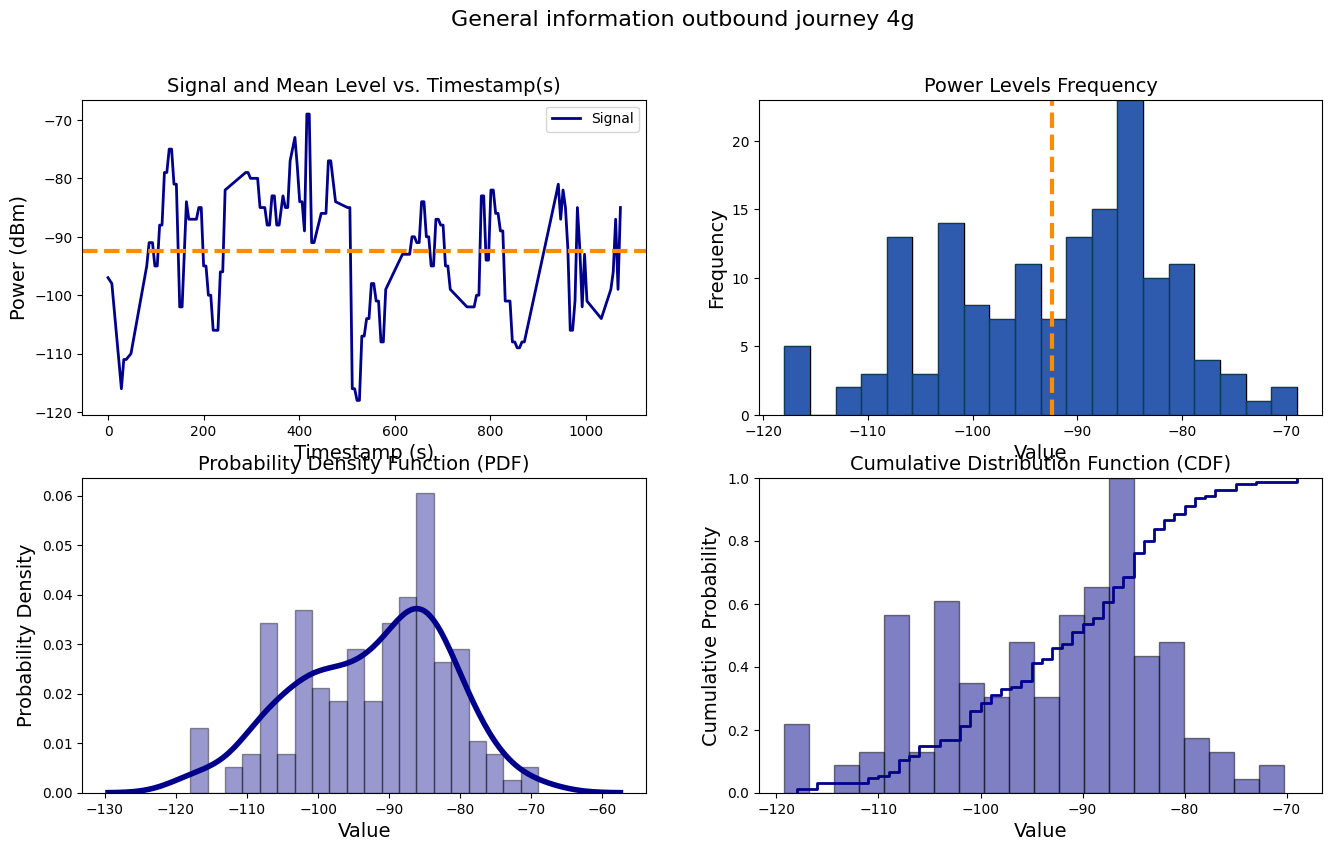

Se han contado 195 cambios de base


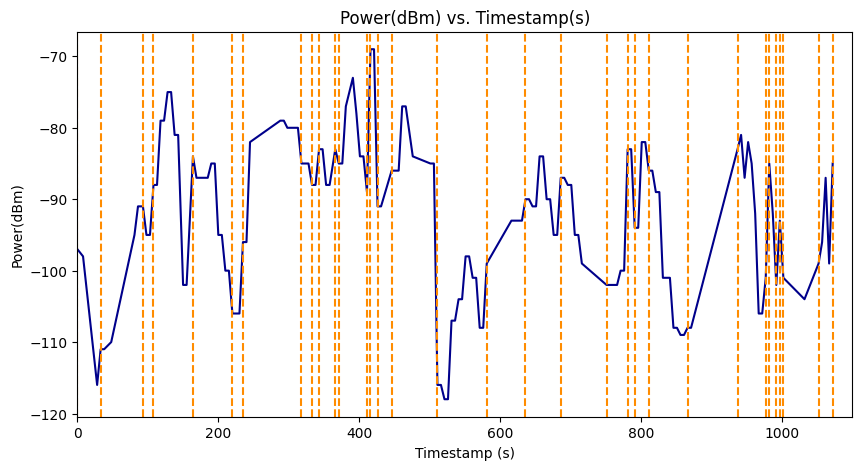

In [46]:
#ignore warnings
import warnings
warnings.filterwarnings("ignore")

important_info = data_plot('ida_4g.xlsx','General information outbound journey 4g')
#guarda important info en un excel
plot_numeric_data(important_info,1100)


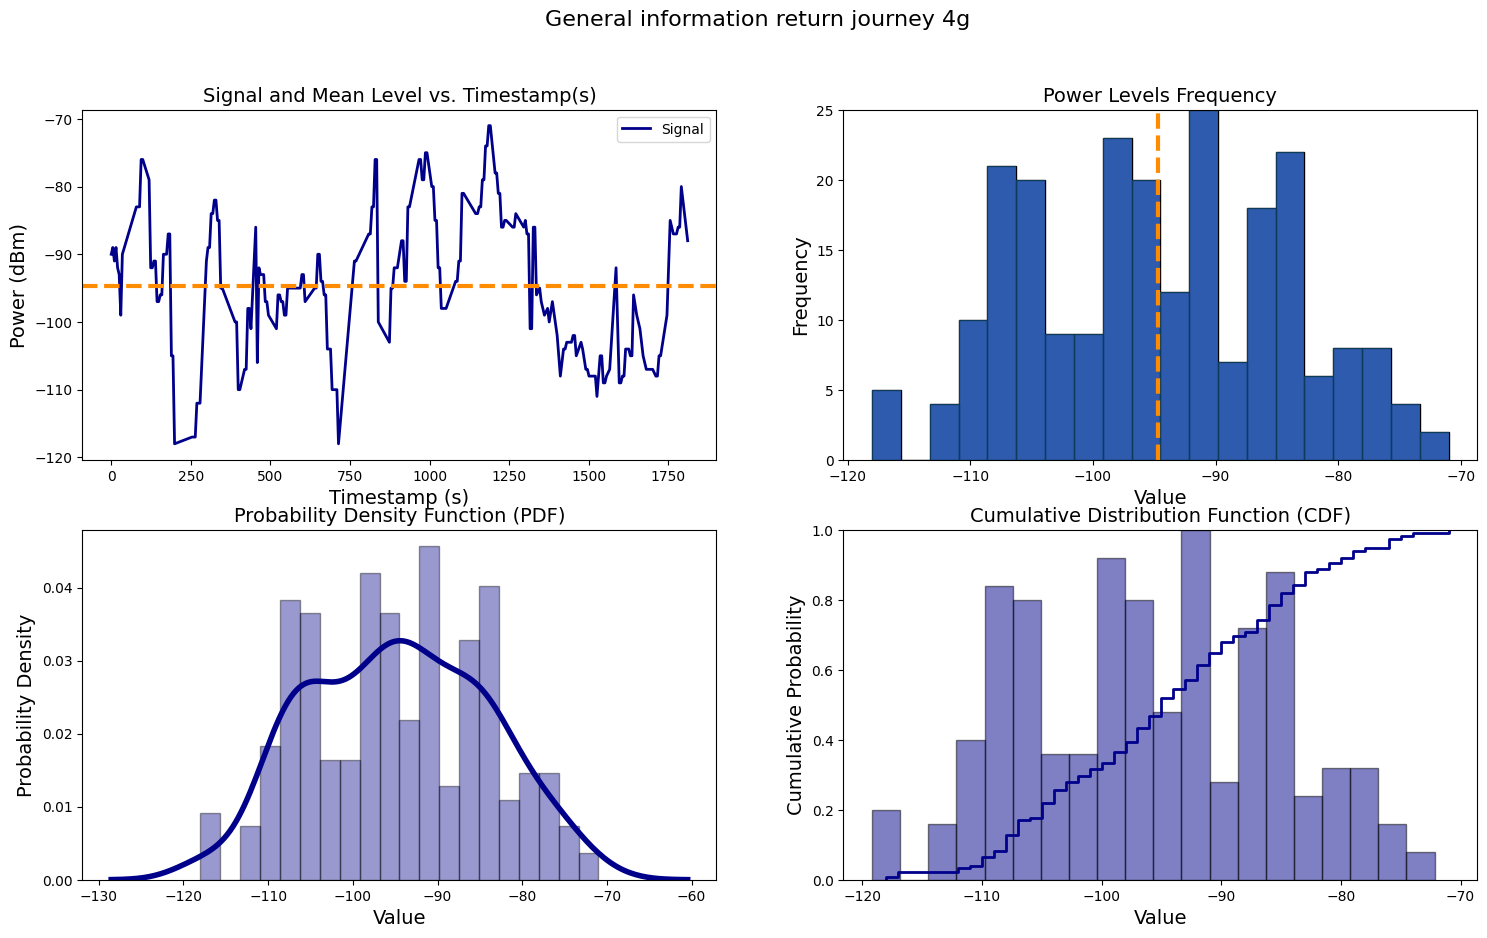

Se han contado 31 cambios de base


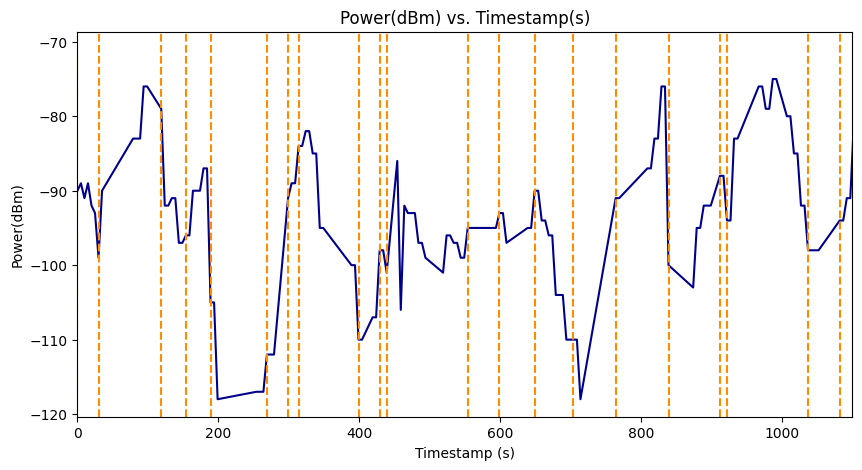

In [38]:
#for vuelta_4g.xlsx
important_info = data_plot('vuelta_4g.xlsx','General information return journey 4g')
plot_numeric_data(important_info,1100)


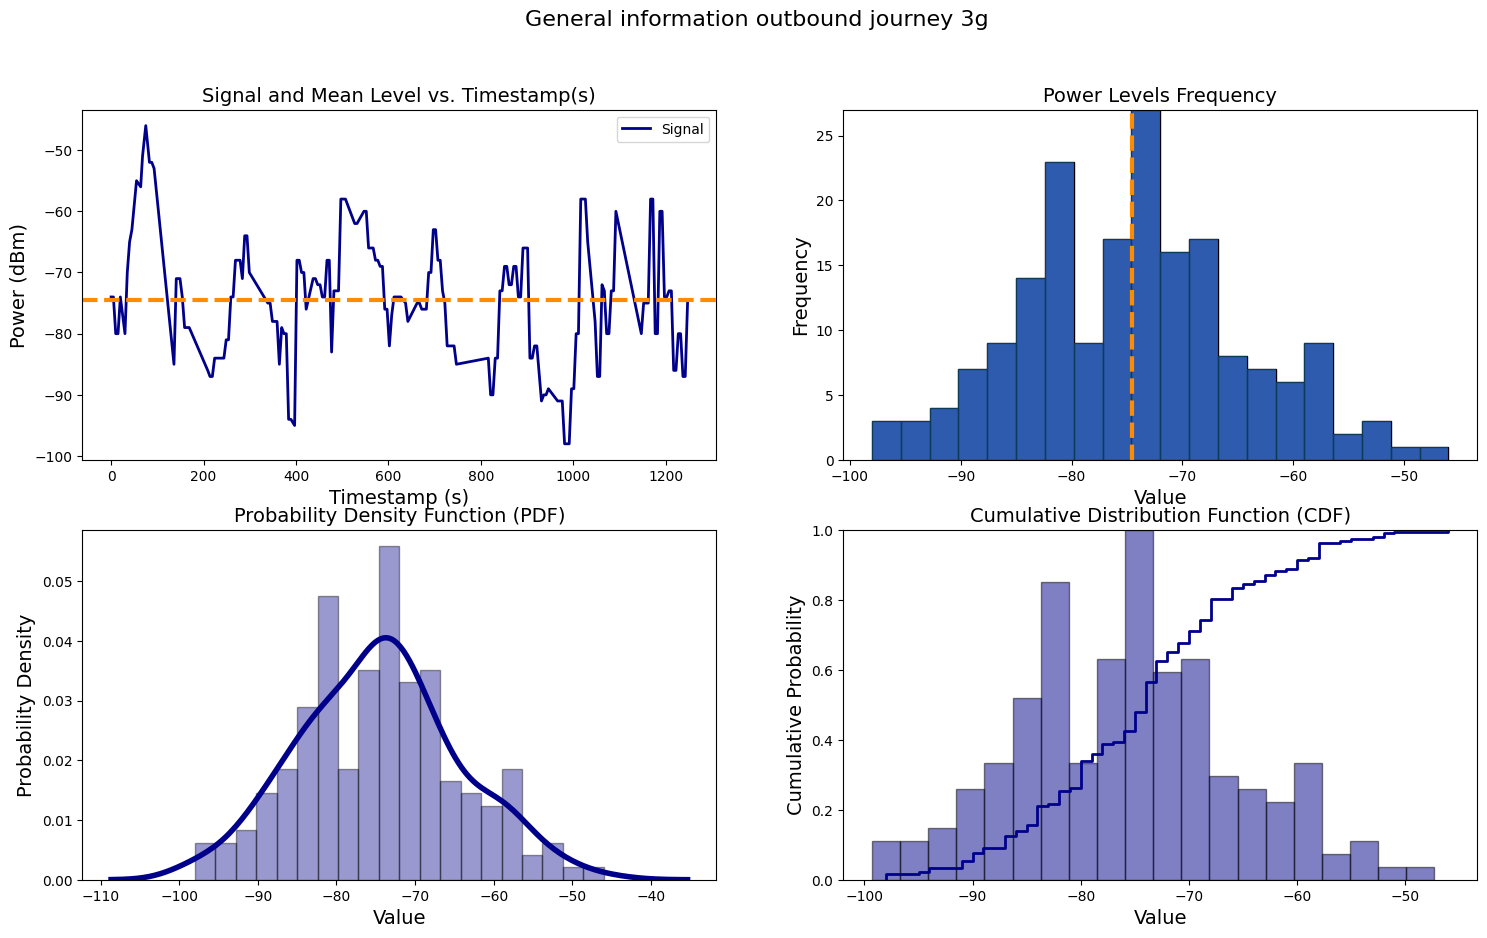

Se han contado 66 cambios de base


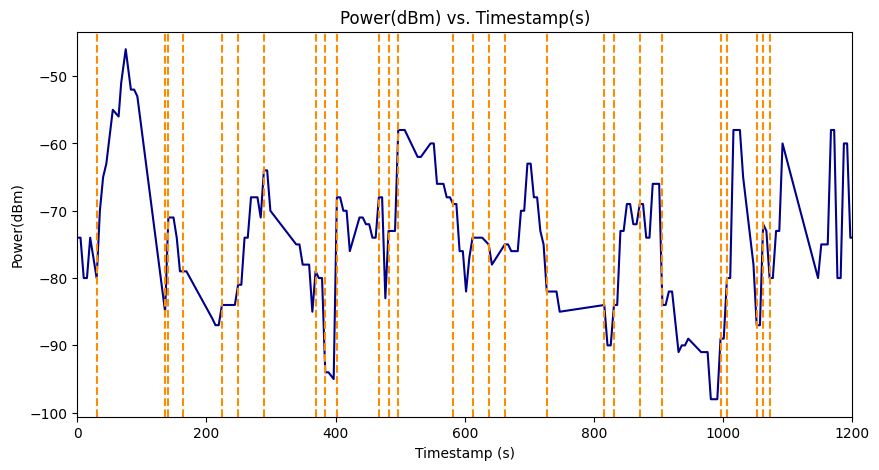

In [39]:
important_info = data_plot('ida_3g.xlsx','General information outbound journey 3g')
plot_numeric_data(important_info,1200)

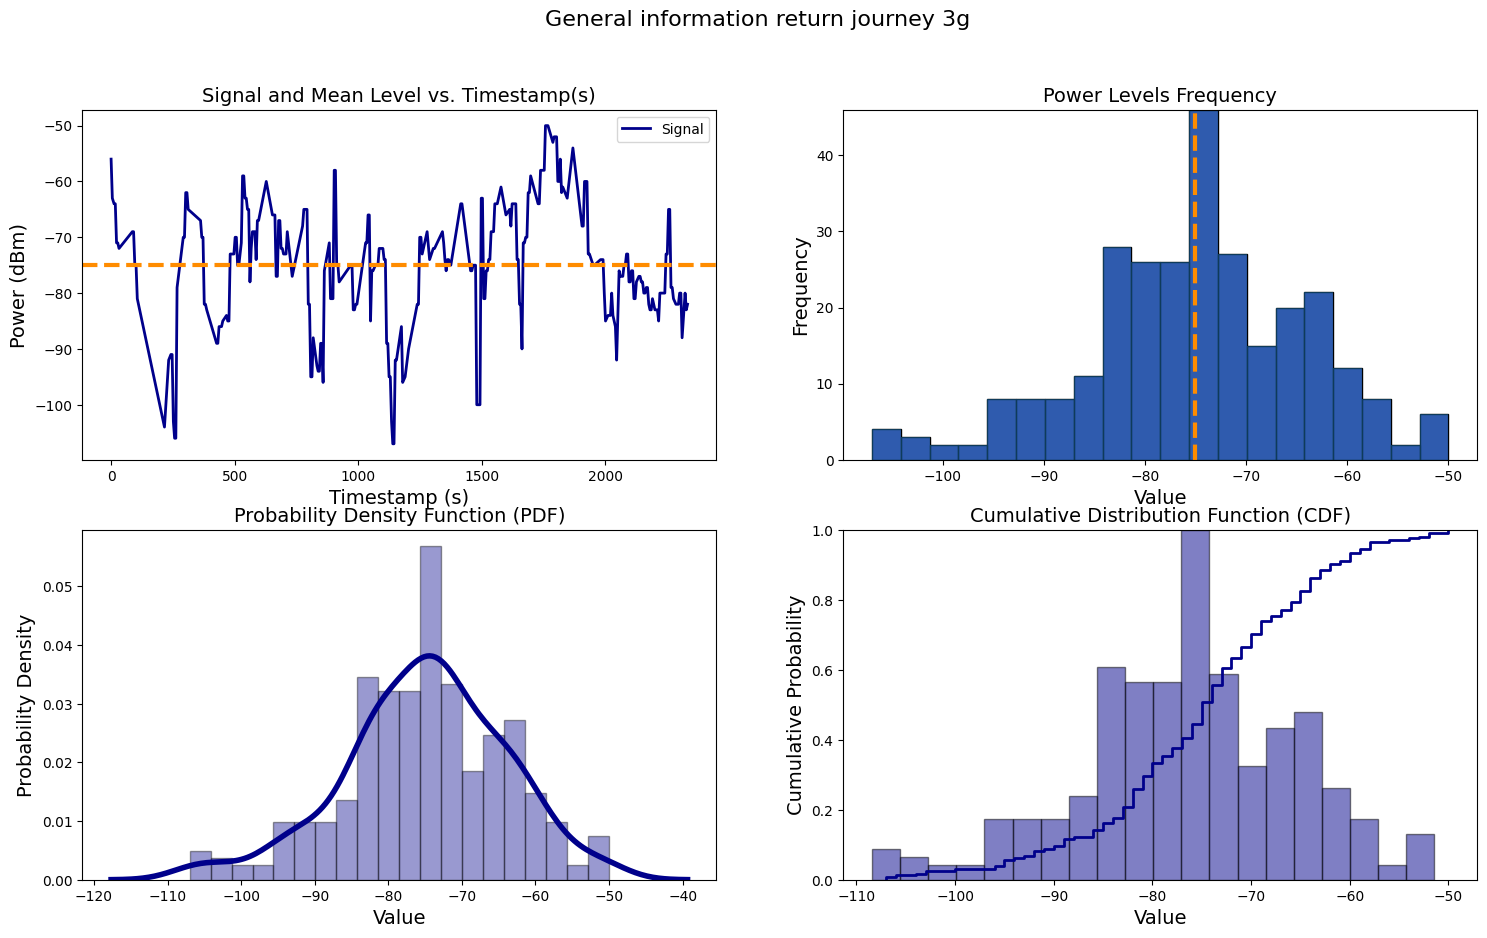

Se han contado 67 cambios de base


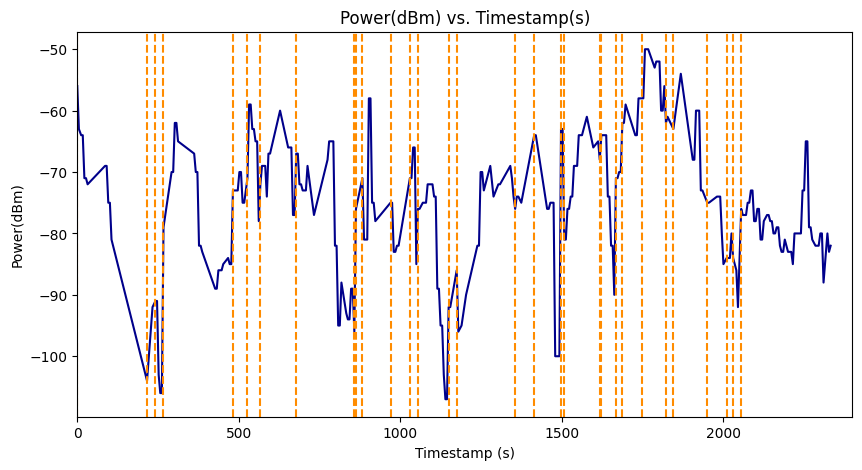

In [40]:
#try both functions with vuelta_3g.xlsx
important_info = data_plot('vuelta_3g.xlsx','General information return journey 3g')
#try plot_numeric_data with vuelta_3g.xlsx
plot_numeric_data(important_info,2400)

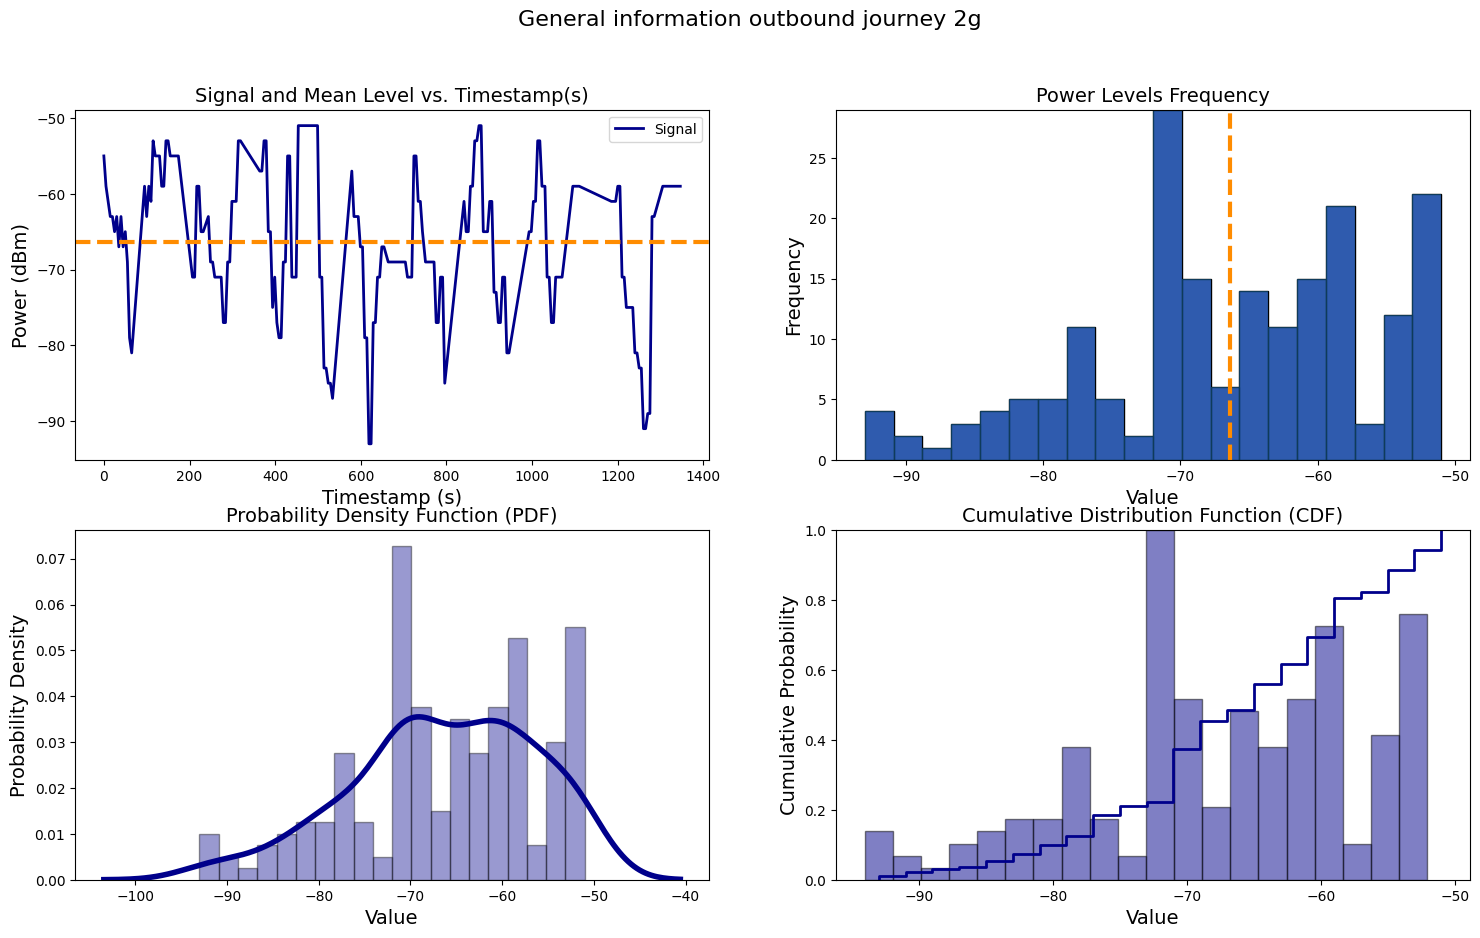

Se han contado 150 cambios de base


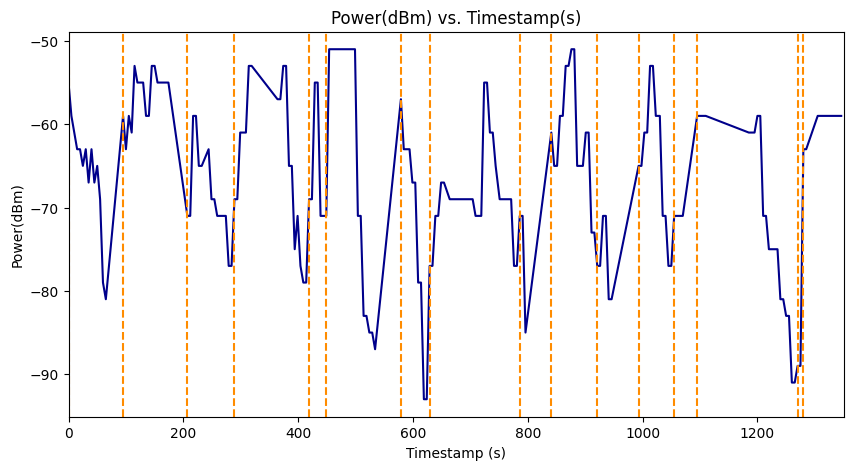

In [41]:
#ida_2g.xlsx
important_info = data_plot('ida_2g.xlsx','General information outbound journey 2g')
plot_numeric_data(important_info,1350)

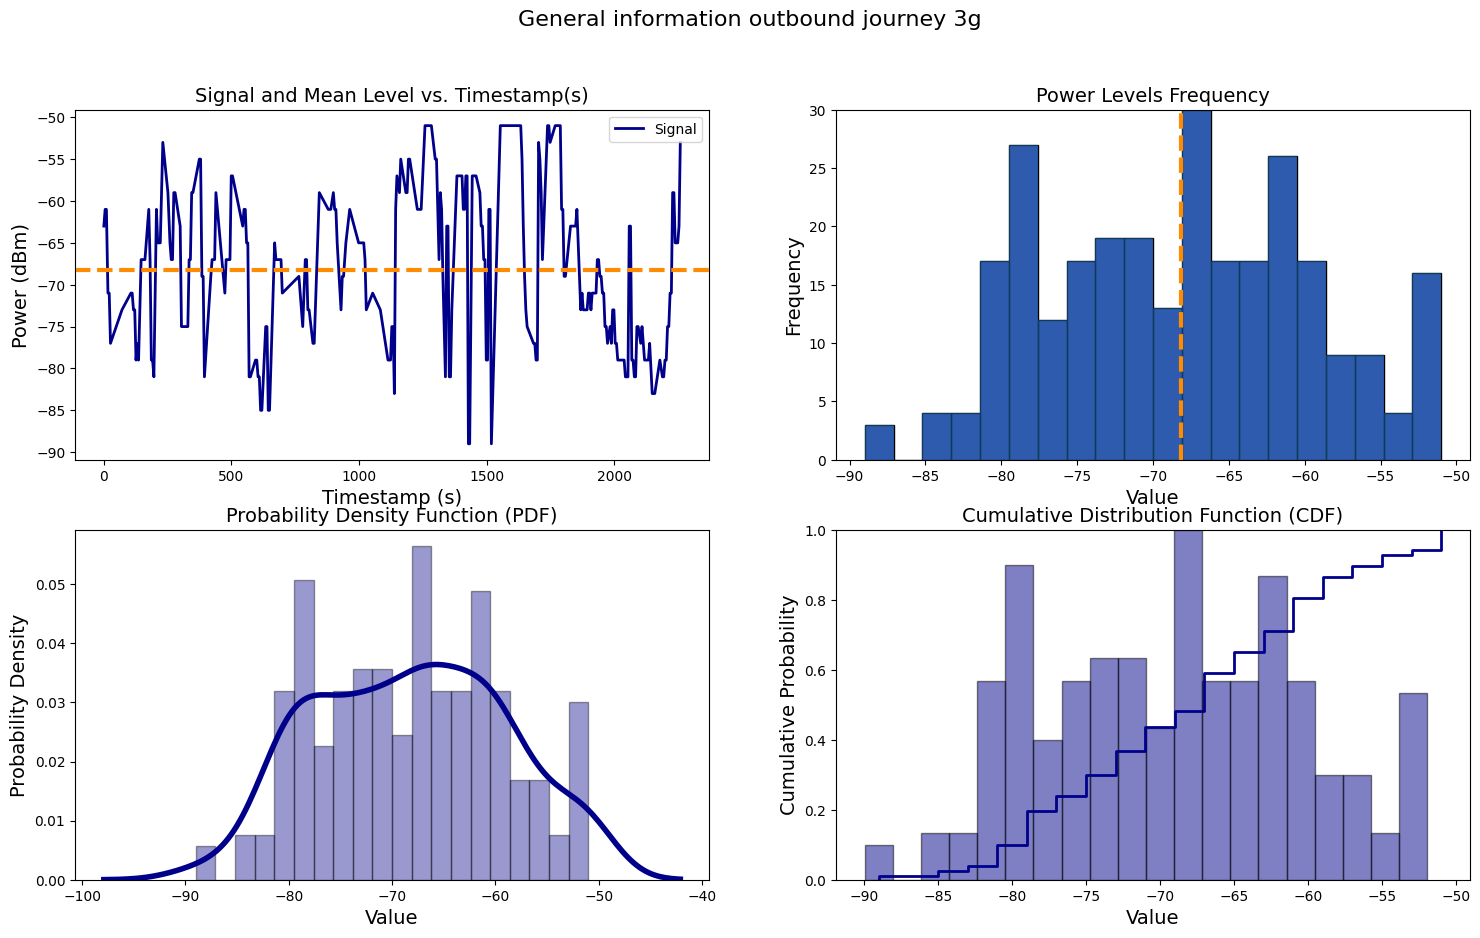

Se han contado 242 cambios de base


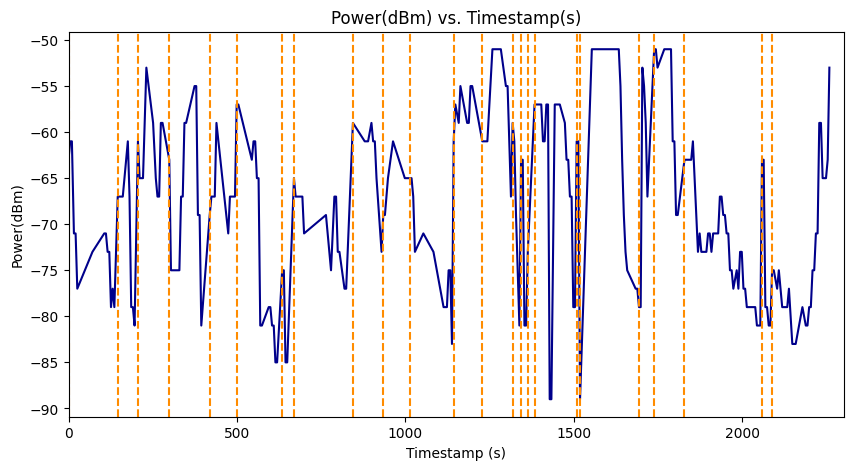

In [42]:

important_info = data_plot('vuelta_2g.xlsx','General information outbound journey 3g')
plot_numeric_data(important_info,2300)